# Importy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm , norm, pareto
import seaborn as sns

___
# Zadanie 1

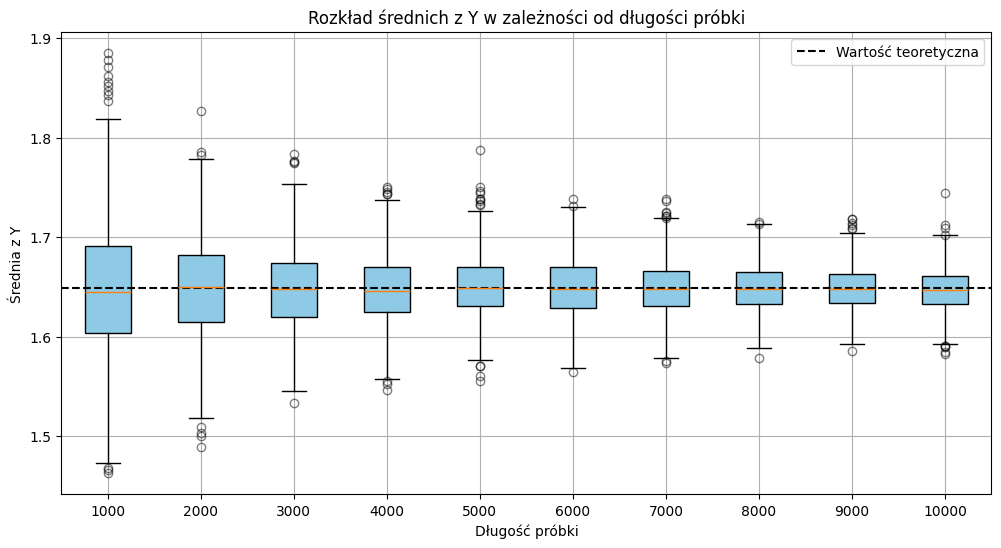

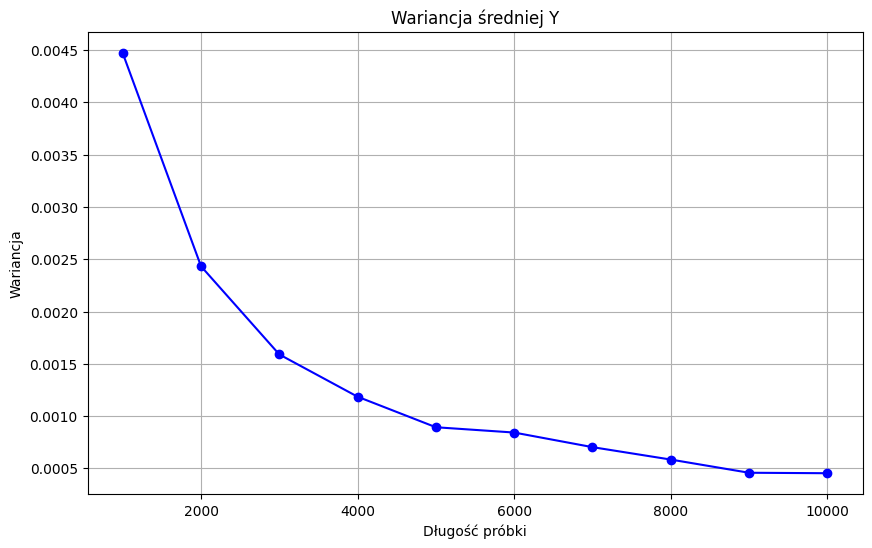

In [2]:
MC = 1000
dlugosci = np.arange(1000, 11000, 1000)
mu = 0
sigma = 1
teoretyczna = np.exp(0.5 * (sigma**2 + 2 * mu))

srednie = []
war = []
for n in dlugosci:
    lista_srednich = []
    for _ in range(MC):
        x = np.random.normal(loc=mu, scale=sigma, size=n) 
        y = np.exp(x)
        srednia = np.mean(y)
        lista_srednich.append(srednia)
    srednie.append(lista_srednich)
    war.append(np.var(lista_srednich))

plt.figure(figsize=(12, 6))
box = plt.boxplot(srednie, patch_artist=True)
for patch in box['boxes']:
    patch.set_facecolor('#8ecae6')
for flier in box['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
plt.axhline(y=teoretyczna, color='black', linestyle='--', label='Wartość teoretyczna')
plt.xticks(ticks=np.arange(1, 11), labels=[str(x) for x in dlugosci])
plt.xlabel('Długość próbki')
plt.ylabel('Średnia z Y')
plt.title('Rozkład średnich z Y w zależności od długości próbki')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(dlugosci, war, marker='o', color='blue')
plt.title('Wariancja średniej Y')
plt.xlabel('Długość próbki')
plt.ylabel('Wariancja')
plt.grid(True)
plt.show()

___
# Zadanie 2

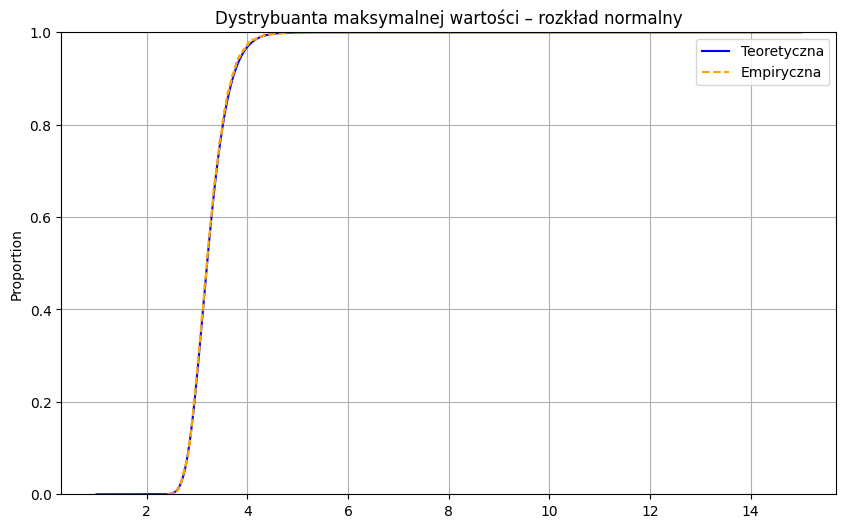

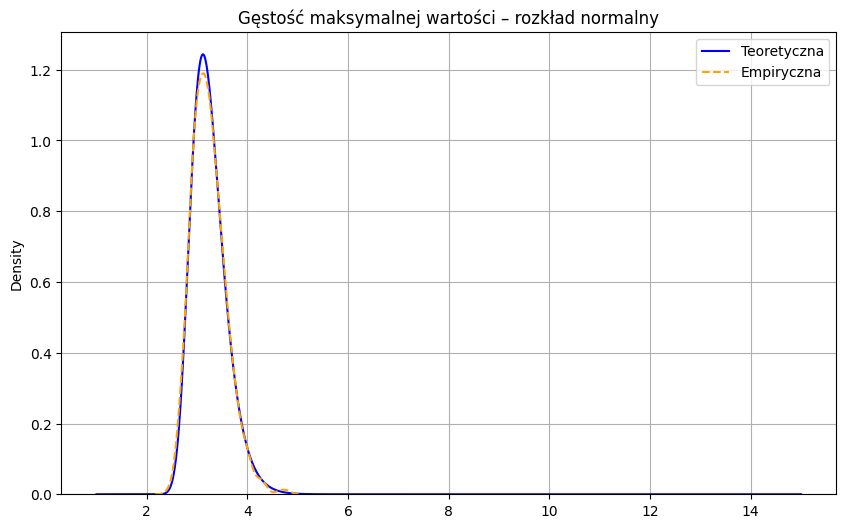

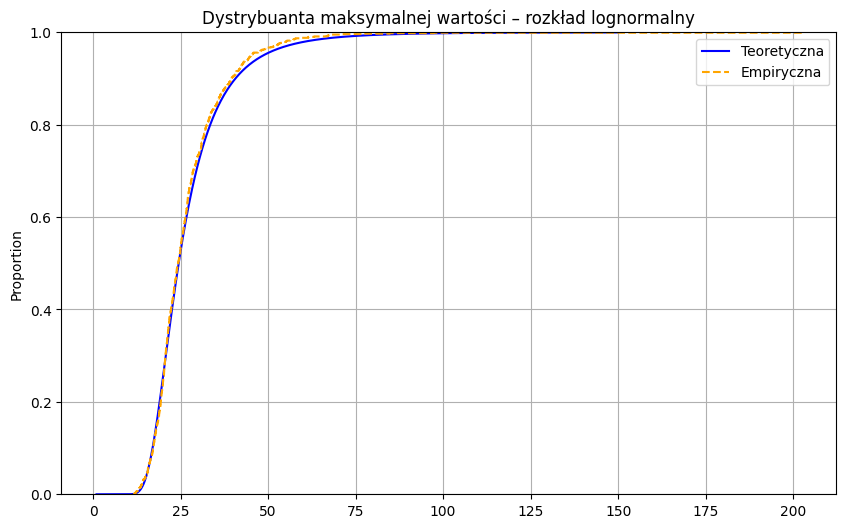

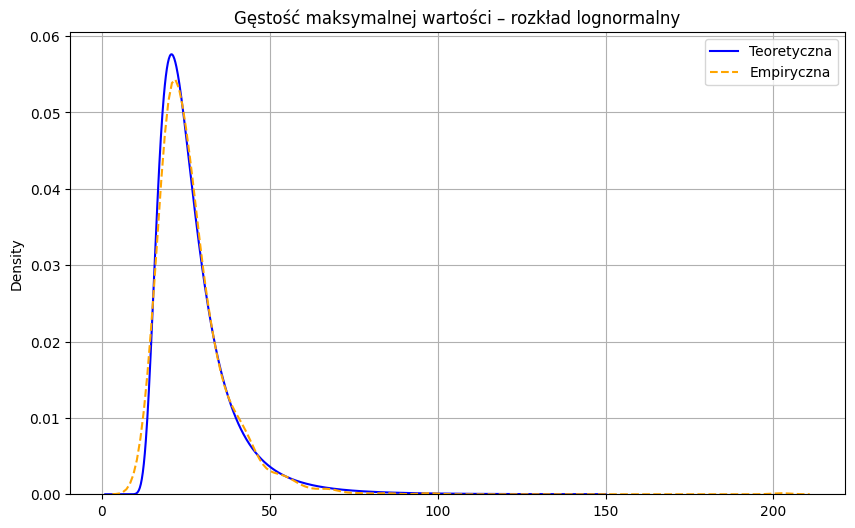

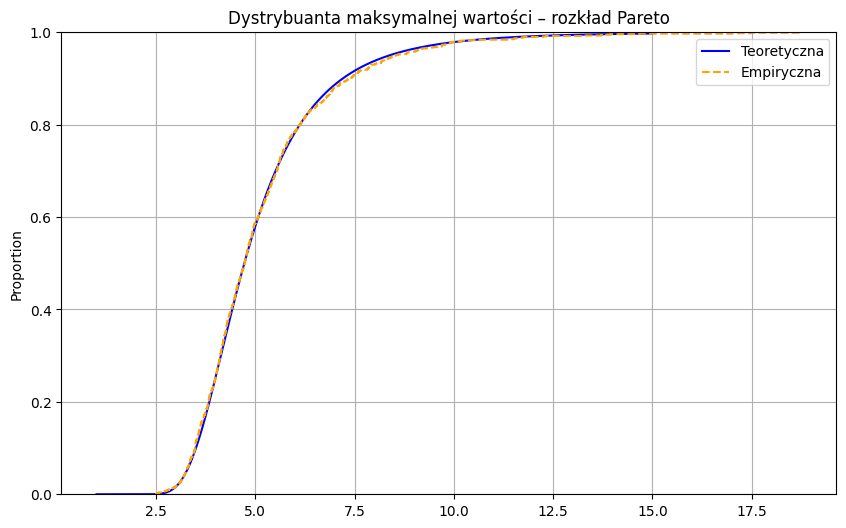

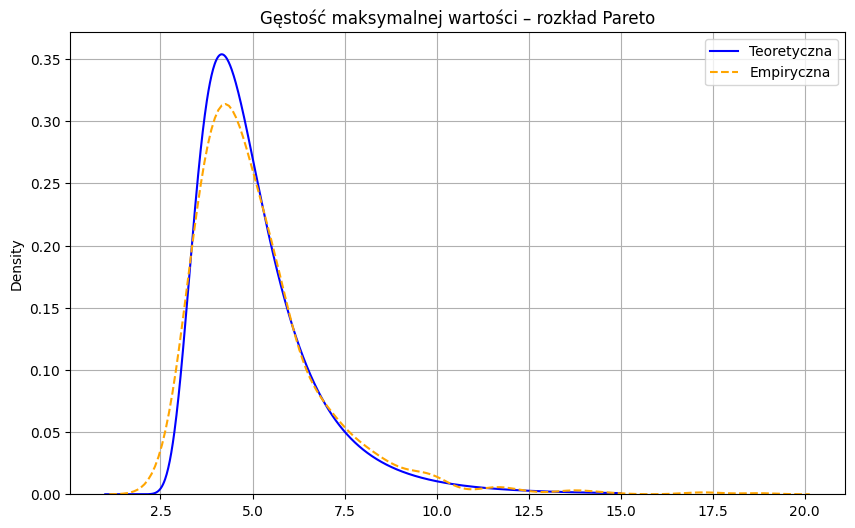

In [4]:
dlugosc = 1000
MC = 1000
mu = 0
sigma = 1
alfa = 6
lamb = 2

def gestosc_normalny(x):
    return (np.exp(-(x - mu)**2 / (2 * sigma**2))) / (np.sqrt(2 * np.pi * sigma))

def dystrybuanta_normalny(x):
    return norm.cdf(x, loc=mu, scale=sigma)

def gestosc_lognormalny(x):
    return lognorm.pdf(x, sigma, mu)

def dystrybuanta_lognormalny(x):
    return lognorm.cdf(x, sigma, mu)

def gestosc_pareto(x):
    return (alfa * lamb**alfa) / (lamb + x)**(alfa + 1)

def dystrybuanta_pareto(x):
    return 1 - (lamb / (lamb + x))**alfa

U_dla_normalnego = [max(np.random.normal(mu, sigma, dlugosc)) for _ in range(MC)]

U_dla_lognormalnego = [max(np.exp(np.random.normal(mu, sigma, dlugosc))) for _ in range(MC)]

U_dla_pareto = [
    max(lamb * np.power(np.random.uniform(0, 1, dlugosc), -1 / alfa) - lamb)
    for _ in range(MC)
]

x1 = np.linspace(1, 15, 1000)
x2 = np.linspace(1, 150, 1000)
x3 = np.linspace(1, 15, 1000)

d_teo_norm = dystrybuanta_normalny(x1) ** dlugosc
d_teo_lognorm = dystrybuanta_lognormalny(x2) ** dlugosc
d_teo_pareto = dystrybuanta_pareto(x3) ** dlugosc

g_teo_norm = dlugosc * dystrybuanta_normalny(x1) ** (dlugosc - 1) * gestosc_normalny(x1)
g_teo_lognorm = dlugosc * dystrybuanta_lognormalny(x2) ** (dlugosc - 1) * gestosc_lognormalny(x2)
g_teo_pareto = dlugosc * dystrybuanta_pareto(x3) ** (dlugosc - 1) * gestosc_pareto(x3)

plt.figure(figsize=(10, 6))
plt.plot(x1, d_teo_norm, label='Teoretyczna', color='blue')
sns.ecdfplot(U_dla_normalnego, label='Empiryczna', linestyle='--', color='orange')
plt.title('Dystrybuanta maksymalnej wartości – rozkład normalny')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x1, g_teo_norm, label='Teoretyczna', color='blue')
sns.kdeplot(U_dla_normalnego, label='Empiryczna', linestyle='--', color='orange')
plt.title('Gęstość maksymalnej wartości – rozkład normalny')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x2, d_teo_lognorm, label='Teoretyczna', color='blue')
sns.ecdfplot(U_dla_lognormalnego, label='Empiryczna', linestyle='--', color='orange')
plt.title('Dystrybuanta maksymalnej wartości – rozkład lognormalny')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x2, g_teo_lognorm, label='Teoretyczna', color='blue')
sns.kdeplot(U_dla_lognormalnego, label='Empiryczna', linestyle='--', color='orange')
plt.title('Gęstość maksymalnej wartości – rozkład lognormalny')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x3, d_teo_pareto, label='Teoretyczna', color='blue')
sns.ecdfplot(U_dla_pareto, label='Empiryczna', linestyle='--', color='orange')
plt.title('Dystrybuanta maksymalnej wartości – rozkład Pareto')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x3, g_teo_pareto, label='Teoretyczna', color='blue')
sns.kdeplot(U_dla_pareto, label='Empiryczna', linestyle='--', color='orange')
plt.title('Gęstość maksymalnej wartości – rozkład Pareto')
plt.grid(True)
plt.legend()
plt.show()

___
# Zadanie 5

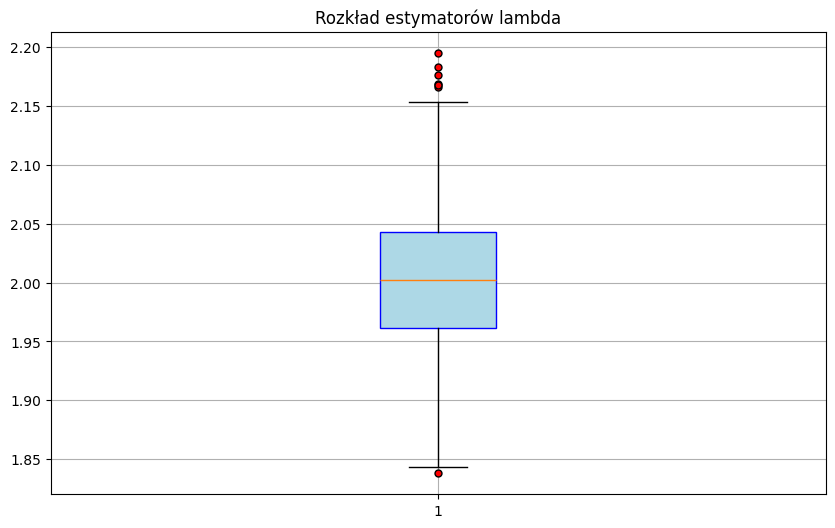

In [5]:
lamb = 2
MC = 1000
estymatory = []

for _ in range(MC):
    Y_1 = np.random.exponential(scale=1/lamb, size=1000)
    Y_2 = np.random.exponential(scale=1/lamb, size=1000)
    X = Y_1 - Y_2
    x_i = np.abs(X)
    estymator = MC / np.sum(x_i)
    estymatory.append(estymator)

plt.figure(figsize=(10, 6))
boxprops = dict(facecolor='lightblue', color='blue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
plt.boxplot(estymatory, patch_artist=True, boxprops=boxprops, flierprops=flierprops)
plt.title('Rozkład estymatorów lambda')
plt.grid(True)
plt.show()

___
# Zadanie 6

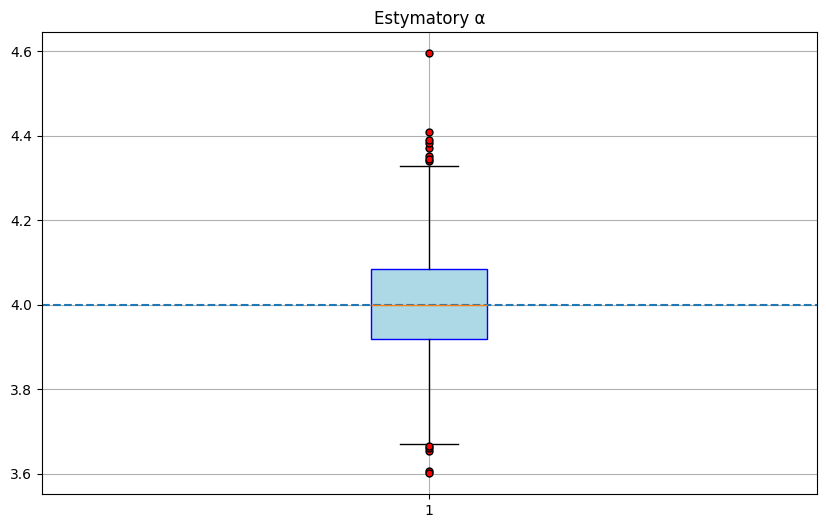

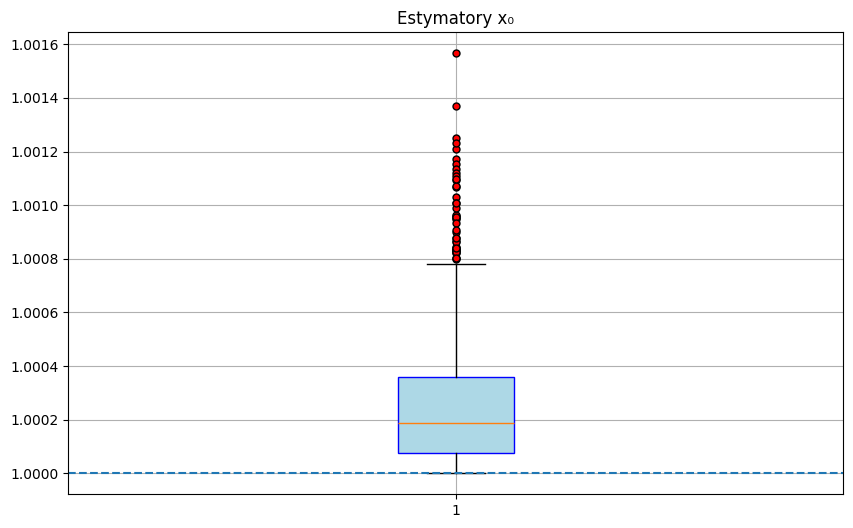

In [ ]:
MC = 1000
n = 1000
alfa = 4
x_0 = 1
estymatory_alfa = []
estymatory_x_0 = []

for i in range(MC):
    U = np.random.uniform(0,1,size = n)
    X = x_0 * np.power((1-U),(-1/alfa))
    logi = [np.log(x) for x in X]
    estymator_alfa = n / (sum(logi) - n*np.log(x_0))
    estymator_x_0 = min(X)
    estymatory_alfa.append(estymator_alfa)
    estymatory_x_0.append(estymator_x_0)

plt.figure(figsize=(10, 6))
boxprops = dict(facecolor='lightblue', color='blue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
plt.boxplot(estymatory_alfa, patch_artist=True, boxprops=boxprops, flierprops=flierprops)
plt.axhline(alfa, linestyle = '--')
plt.title('Estymatory α')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(estymatory_x_0, patch_artist=True, boxprops=boxprops, flierprops=flierprops)
plt.title('Estymatory x₀')
plt.axhline(x_0, linestyle = '--')
plt.grid(True)
plt.show()

___
# Zadanie 7

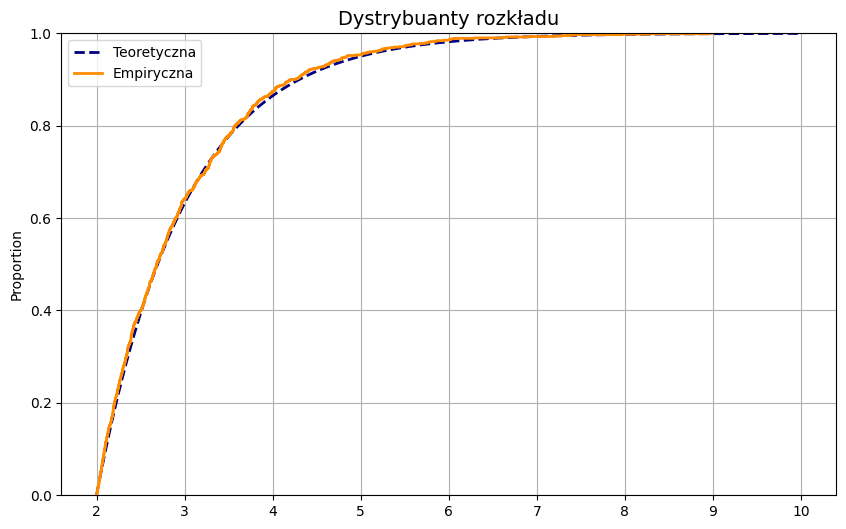

In [7]:
lamb_ = 1
teta = 2
n = 1000

X = np.random.exponential(scale = lamb_,size = n)
Y = X+teta
def dystrybuanta(x):
    return 1 - np.exp(teta - x)

xs = np.linspace(2,10,n)
plt.figure(figsize=(10, 6))
plt.plot(xs, dystrybuanta(xs), label='Teoretyczna', linestyle='--', linewidth=2, color='navy')
sns.ecdfplot(Y, label='Empiryczna', linewidth=2, color='darkorange')
plt.title('Dystrybuanty rozkładu', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

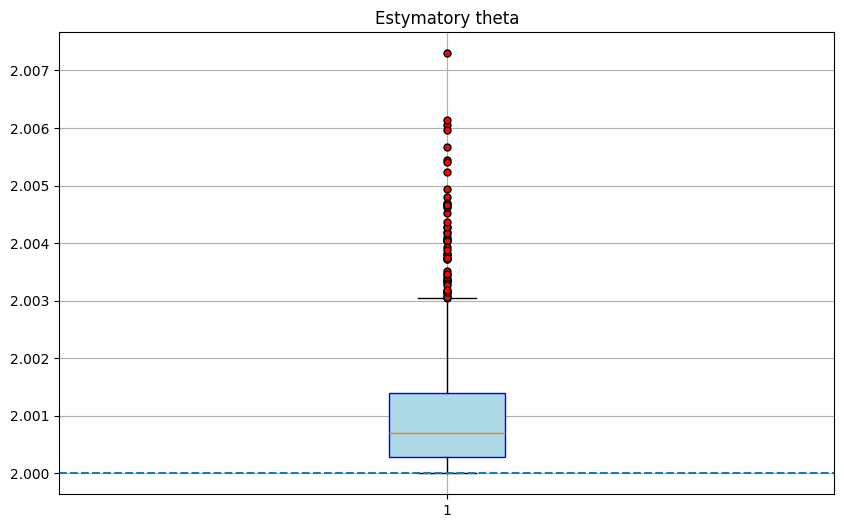

In [12]:
MC = 1000
n = 1000
lamb_ = 1
teta = 2
estymatory_teta = []
for i in range(MC):
    X = np.random.exponential(scale = lamb_,size = n)
    Y = X+teta
    estymator = min(Y)
    estymatory_teta.append(estymator)

plt.figure(figsize=(10, 6))
boxprops = dict(facecolor='lightblue', color='blue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
plt.boxplot(estymatory_teta, patch_artist=True, boxprops=boxprops, flierprops=flierprops)
plt.axhline(teta, linestyle = '--')
plt.title('Estymatory theta')
plt.grid(True)
plt.show()

___
# Zadanie 8

Średnia błędu pierwszego estymatora to: 0.0004588056836418089
Średnia błędu drugiego estymatora to: 0.0006566024285689996


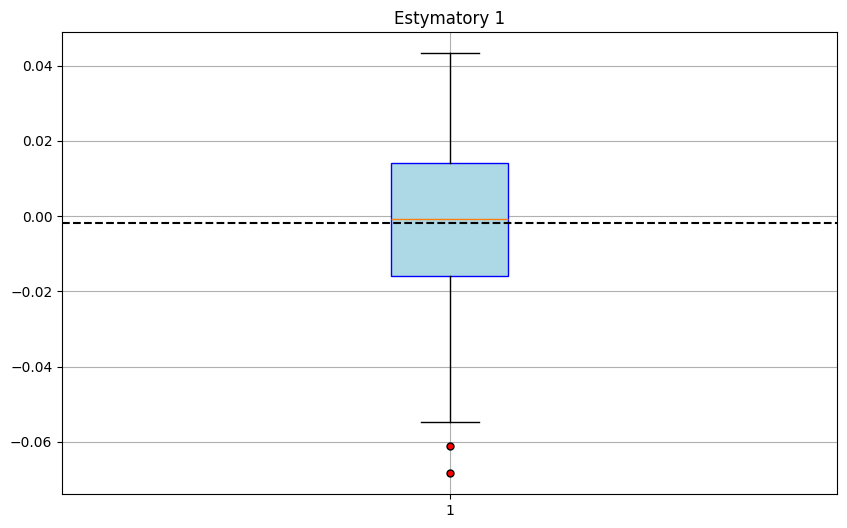

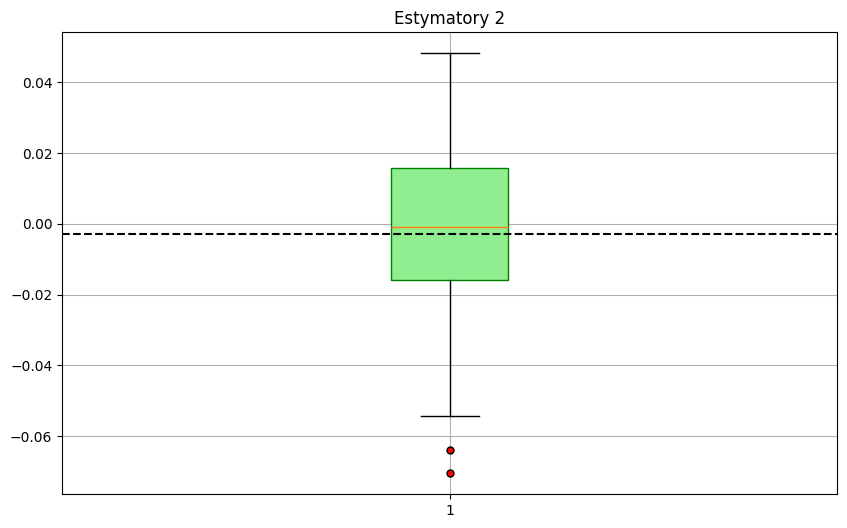

In [15]:
n = 1000
MC = 100
mu = 0
sigma = 1
estymatorki_1 = []
estymatorki_2 = []
bledy_1 = []
bledy_2 = []

for i in range(MC):
    X = np.random.normal(mu, sigma, size=(2*n) + 1)
    estymator_1 = (1 / ((2*n) + 1)) * sum(X)
    estymator_2 = np.median(X)

    blad_1 = (estymator_1 - mu)**2
    blad_2 = (estymator_2 - mu)**2

    bledy_1.append(blad_1)
    bledy_2.append(blad_2)

    estymatorki_1.append(estymator_1)
    estymatorki_2.append(estymator_2)

srednia_bledu_1 = np.mean(bledy_1)
srednia_bledu_2 = np.mean(bledy_2)

print('Średnia błędu pierwszego estymatora to:', srednia_bledu_1)
print('Średnia błędu drugiego estymatora to:', srednia_bledu_2)

plt.figure(figsize=(10, 6))
boxprops = dict(facecolor='lightblue', color='blue')
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
plt.boxplot(estymatorki_1, patch_artist=True, boxprops=boxprops, flierprops=flierprops)
plt.axhline(np.mean(estymatorki_1), linestyle='--', color='black')
plt.title('Estymatory 1')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
boxprops = dict(facecolor='lightgreen', color='green')
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
plt.boxplot(estymatorki_2, patch_artist=True, boxprops=boxprops, flierprops=flierprops)
plt.axhline(np.mean(estymatorki_2), linestyle='--', color='black')
plt.title('Estymatory 2')
plt.grid(True)
plt.show()

___
# Zadanie 10

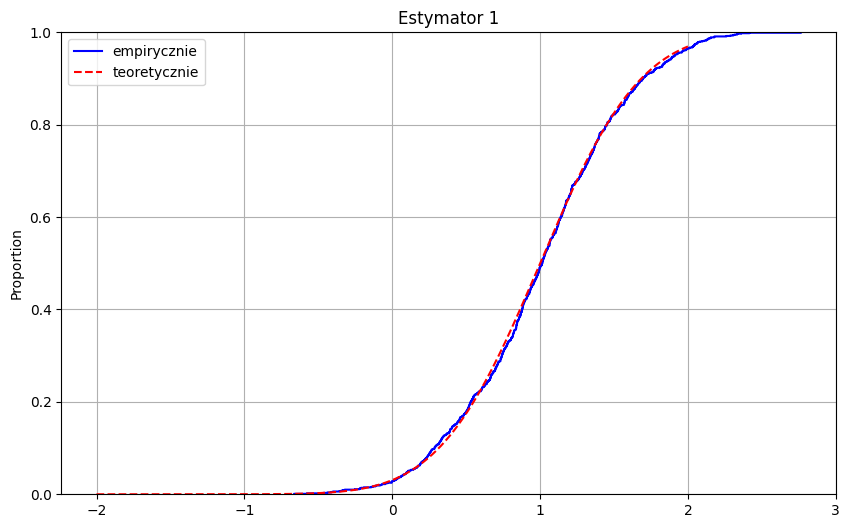

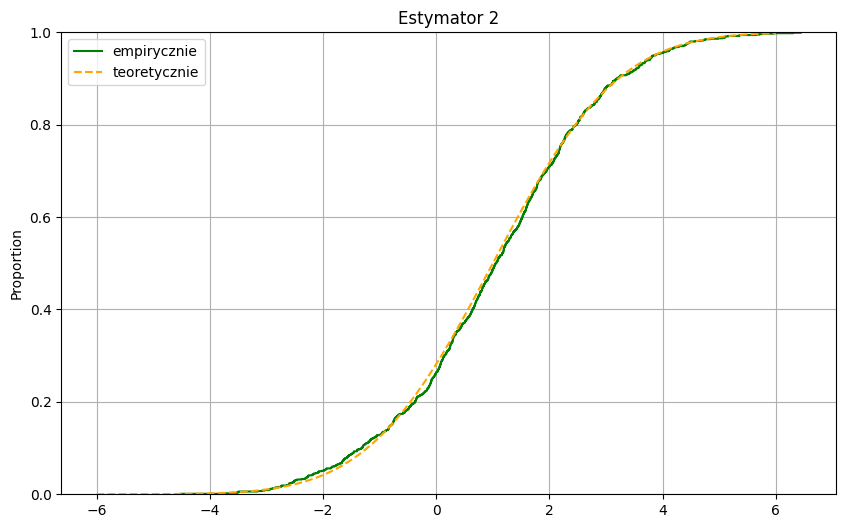

In [16]:
n = 1000
mu = 1
sigma = np.sqrt(2)
sigma_kwadrat = 2
est1 = []
est2 = []

for _ in range(n):
    Xi = np.random.normal(mu, sigma, size=7)
    teta1 = sum(Xi) / 7
    est1.append(teta1)
    teta2 = (2 * Xi[0] - Xi[5] + Xi[3]) / 2
    est2.append(teta2)

x1 = np.linspace(-2, 2, 10000)
x2 = np.linspace(-6, 6, 10000)
teoretyczna_1 = norm.cdf(x1, mu, np.sqrt(sigma_kwadrat / 7))
teoretyczna_2 = norm.cdf(x2, mu, np.sqrt(3 * sigma_kwadrat / 2))

plt.figure(figsize=(10, 6))
plt.title('Estymator 1')
sns.ecdfplot(est1, label='empirycznie', linestyle='-', color='blue')
plt.plot(x1, teoretyczna_1, label='teoretycznie', linestyle='--', color='red')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Estymator 2')
sns.ecdfplot(est2, label='empirycznie', color='green')
plt.plot(x2, teoretyczna_2, label='teoretycznie', linestyle='--', color='orange')
plt.legend()
plt.grid(True)
plt.show()